In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
df = pd.read_csv('Join_data.csv').iloc[:,1:]

In [64]:
df.corr(method='pearson')

,gameId,teamId,champ_WR_dif,user_champ_WR,top_tier,jug_tier,mid_tier,carry_tier,support_tier,c_top_tier,...,marksman,controller,c_slayer,c_tank,c_fighter,c_mage,c_marksman,c_controller,match_cnt,win
gameId,1.000000,0.043550,0.012488,0.008772,-0.029896,0.001377,-0.019604,-0.004242,-0.031767,-0.037417,...,0.017579,-0.070844,-0.040217,0.028312,0.007361,0.037591,-0.013598,-0.029054,-0.110313,-0.000361
teamId,0.043550,1.000000,0.045001,0.010114,0.024701,0.022401,0.004474,0.044557,0.006939,-0.012979,...,-0.013610,0.026239,-0.016477,0.035207,-0.005801,0.029360,-0.014568,-0.035903,-0.024535,-0.016757
champ_WR_dif,0.012488,0.045001,1.000000,0.009055,0.011865,-0.047446,-0.023573,-0.013766,-0.009909,0.035927,...,-0.006008,-0.048995,-0.033037,0.008251,0.009736,0.057035,-0.023310,-0.031910,0.022644,0.030340
user_champ_WR,0.008772,0.010114,0.009055,1.000000,0.020281,-0.021419,-0.018010,-0.070491,0.004413,-0.000604,...,-0.035101,0.034870,0.009343,-0.002706,-0.038699,0.056407,0.016003,-0.037013,0.106546,0.439009
top_tier,-0.029896,0.024701,0.011865,0.020281,1.000000,-0.035172,-0.011685,-0.003128,0.002182,0.003451,...,0.050209,0.069611,-0.022445,-0.009981,0.002819,0.012357,0.033100,-0.011981,0.031466,-0.010304
jug_tier,0.001377,0.022401,-0.047446,-0.021419,-0.035172,1.000000,0.049447,0.000691,-0.004356,0.019598,...,-0.286550,-0.006109,-0.027426,0.039545,-0.000026,-0.020383,0.024894,-0.012681,-0.060041,-0.010229
mid_tier,-0.019604,0.004474,-0.023573,-0.018010,-0.011685,0.049447,1.000000,-0.004152,0.026894,0.003773,...,-0.015725,0.088775,-0.007120,-0.004529,-0.010040,-0.012464,0.008990,0.035300,0.023185,-0.010404
carry_tier,-0.004242,0.044557,-0.013766,-0.070491,-0.003128,0.000691,-0.004152,1.000000,0.081664,0.007446,...,-0.215299,0.092971,-0.039683,-0.002875,0.038941,0.012002,0.001992,-0.021572,0.008202,-0.060120
support_tier,-0.031767,0.006939,-0.009909,0.004413,0.002182,-0.004356,0.026894,0.081664,1.000000,0.010220,...,0.022724,0.100704,-0.034670,-0.020129,0.005483,0.005550,-0.007383,0.058305,-0.060757,-0.013617
c_top_tier,-0.037417,-0.012979,0.035927,-0.000604,0.003451,0.019598,0.003773,0.007446,0.010220,1.000000,...,-0.038544,-0.011215,-0.010739,-0.119056,-0.037107,0.056038,0.054120,0.087729,-0.024205,0.022961


In [65]:
knn = KNeighborsClassifier()

In [66]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [67]:
svm=svm.SVC()

In [68]:
svm.fit(X,y)

SVC()

In [69]:
svm.score(X,y)

0.6806318681318682

In [70]:
result = cross_val_score(svm,X,y)

In [71]:
result.mean()

0.6346467071505908

In [72]:
k_range = list(range(1,31))

In [73]:
param_grid = dict(n_neighbors = k_range) 

In [74]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [75]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [76]:
grid_mean_scores = grid.cv_results_['mean_test_score']

Text(0, 0.5, 'Cross-Validated Accuracy')

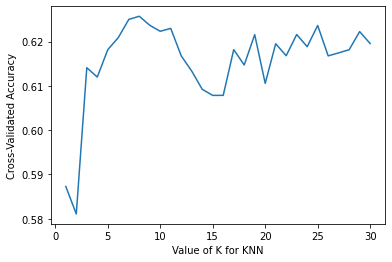

In [77]:
plt.plot(k_range,grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [78]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6257345299952763
{'n_neighbors': 8}
KNeighborsClassifier(n_neighbors=8)


In [79]:
df_copy= df.copy()

In [80]:
def remove_outlier_test(df_c,column):
    fraud_column_data = df_c[column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    
    IQR = quan_75 - quan_25
    IQR += 1.5
    lowest = quan_25 - IQR
    higest = quan_75 + IQR
    outlier_index = fraud_column_data[(fraud_column_data < lowest ) | (fraud_column_data > higest)].index
    print(len(outlier_index))
    df_c.drop(outlier_index, axis=0, inplace=True)
    return df_c

In [82]:
df_copy = remove_outlier_test(df_copy,'user_champ_WR')

113


In [83]:
X_cp=df_copy.iloc[:,1:-1]
y_cp=df_copy.iloc[:,-1]

In [84]:
svm.fit(X_cp,y_cp)

SVC()

In [85]:
svm.score(X_cp,y_cp)

0.6612062546537603